## Welcome to NEAT-Brain!

NEAT-Brain (Nash Equilibrium Analysis Tool for Brain Metabolism) is an interactive dashboard for the exploration of brain metabolism based on game theory. This software utilizes a modified Bayesian Nash Equilibrium algorithm to model the biochemical resource competition in brain metabolism and the suboptimal payoffs associated with neurodegenerative disease with an emphasis on Alzheimer’s. Alzheimer’s disease (AD) is an age-associated, multifactorial neurodegenerative disorder that is the incurable. 

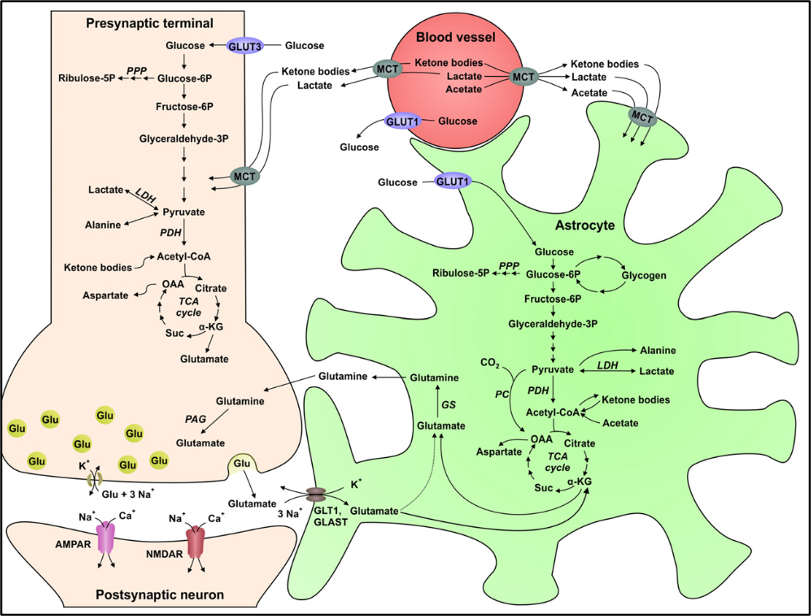


## Environment Setup
Before starting this endeavor we're going to first setup our environment

In [1]:
import os
import numpy as np
import pandas as pd
import session_info
import ipywidgets as widgets
import matplotlib.pyplot as plt

plt.style.use('ggplot')


# Pulling in the Biochemical and Metabolic Reaction Data

The notebook for generating this data has been provided (reaction_curve_generation_script.ipynb). However, we have provided post-processed version of clean data for the simulation. 

In [2]:
data_directory = os.path.dirname(os.getcwd())+'/data'
df = pd.read_csv(data_directory + "/cloutier_2009_data.csv")
df.head(10)

,environment | time (s),ADPg | ADPg (mM),ADPn | ADPn (mM),AMPg | AMPg (mM),AMPn | AMPn (mM),ATPg | ATPg (mM),ATPg | ATPg' (mM/s),ATPn | ATPn (mM),ATPn | ATPn' (mM/s),BOLD | BOLD (dimensionless),...,Vn_pk | Vn_pk (mM_per_s),Vn_pump | Vn_pump (mM_per_s),Vn_stim | Vn_stim (mM_per_s),Vn_stim_GLU | Vn_stim_GLU (mM_per_s),Vnc_CO2 | Vnc_CO2 (mM_per_s),Vne_LAC | Km_ne_LAC (mM),Vne_LAC | Vmax_ne_LAC (mM_per_s),Vne_LAC | Vne_LAC (mM_per_s),Vv | Vv (dimensionless),Vv | Vv' (dimensionless/s)
0,0,0.130710,0.113592,0.008290,0.006208,2.24000,0.000190,2.25920,-1.229620e-03,0.041793,...,0.012020,0.158301,0.0,0.0,0.038752,0.09314,0.1978,-0.001017,0.023700,-0.000005
1,1,0.130563,0.113612,0.008271,0.006210,2.24017,0.000145,2.25918,3.120000e-07,0.041790,...,0.011999,0.158301,0.0,0.0,0.039028,0.09314,0.1978,-0.001017,0.023695,-0.000005
2,2,0.130450,0.113612,0.008257,0.006210,2.24029,0.000111,2.25918,1.250000e-07,0.041790,...,0.011996,0.158301,0.0,0.0,0.039029,0.09314,0.1978,-0.001017,0.023690,-0.000005
3,3,0.130364,0.113612,0.008245,0.006210,2.24039,0.000086,2.25918,6.400000e-08,0.041790,...,0.011995,0.158301,0.0,0.0,0.039030,0.09314,0.1978,-0.001017,0.023685,-0.000005
4,4,0.130297,0.113612,0.008237,0.006210,2.24047,0.000066,2.25918,3.450000e-08,0.041790,...,0.011995,0.158301,0.0,0.0,0.039030,0.09314,0.1978,-0.001017,0.023681,-0.000004
5,5,0.130245,0.113612,0.008230,0.006210,2.24052,0.000052,2.25918,3.310000e-08,0.041791,...,0.011995,0.158301,0.0,0.0,0.039030,0.09314,0.1978,-0.001017,0.023676,-0.000004
6,6,0.130205,0.113612,0.008224,0.006210,2.24057,0.000041,2.25918,2.310000e-08,0.041792,...,0.011995,0.158301,0.0,0.0,0.039030,0.09314,0.1978,-0.001017,0.023672,-0.000004
7,7,0.130173,0.113612,0.008220,0.006210,2.24061,0.000032,2.25918,2.920000e-08,0.041792,...,0.011995,0.158301,0.0,0.0,0.039030,0.09314,0.1978,-0.001017,0.023668,-0.000004
8,8,0.130147,0.113612,0.008217,0.006210,2.24064,0.000026,2.25918,1.780000e-08,0.041793,...,0.011996,0.158301,0.0,0.0,0.039030,0.09314,0.1978,-0.001017,0.023665,-0.000004
9,9,0.130127,0.113612,0.008214,0.006210,2.24066,0.000021,2.25918,1.190000e-08,0.041793,...,0.011996,0.158301,0.0,0.0,0.039030,0.09314,0.1978,-0.001017,0.023661,-0.000003


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 190 entries, environment | time (s) to Vv | Vv' (dimensionless/s)
dtypes: float64(183), int64(7)
memory usage: 1.5 MB


In [4]:
df.describe()

,environment | time (s),ADPg | ADPg (mM),ADPn | ADPn (mM),AMPg | AMPg (mM),AMPn | AMPn (mM),ATPg | ATPg (mM),ATPg | ATPg' (mM/s),ATPn | ATPn (mM),ATPn | ATPn' (mM/s),BOLD | BOLD (dimensionless),...,Vn_pk | Vn_pk (mM_per_s),Vn_pump | Vn_pump (mM_per_s),Vn_stim | Vn_stim (mM_per_s),Vn_stim_GLU | Vn_stim_GLU (mM_per_s),Vnc_CO2 | Vnc_CO2 (mM_per_s),Vne_LAC | Km_ne_LAC (mM),Vne_LAC | Vmax_ne_LAC (mM_per_s),Vne_LAC | Vne_LAC (mM_per_s),Vv | Vv (dimensionless),Vv | Vv' (dimensionless/s)
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1.001000e+03,1001.000000,1001.000000,1.001000e+03
mean,500.000000,0.218850,0.113643,0.032933,0.006214,2.127217,0.000013,2.259143,-7.448348e-07,0.043641,...,0.011992,0.163155,0.017319,0.001277,0.040007,9.314000e-02,1.978000e-01,-0.001396,0.024991,-1.028353e-07
std,289.108111,0.111198,0.000291,0.032106,0.000033,0.143111,0.001595,0.000324,4.210172e-05,0.002894,...,0.000086,0.008011,0.062081,0.004576,0.001588,7.636599e-16,8.053140e-16,0.000676,0.002005,3.499796e-05
min,0.000000,0.118926,0.113399,0.006823,0.006186,1.905650,-0.011733,2.257720,-1.229620e-03,0.041049,...,0.011898,0.158301,0.000000,0.000000,0.038752,9.314000e-02,1.978000e-01,-0.002608,0.023600,-2.675900e-04
25%,250.000000,0.122172,0.113445,0.007212,0.006192,1.934760,-0.000004,2.259050,-3.430000e-07,0.041759,...,0.011954,0.158302,0.000000,0.000000,0.039030,9.314000e-02,1.978000e-01,-0.002172,0.023600,-4.200000e-08
50%,500.000000,0.139906,0.113612,0.009543,0.006210,2.229550,0.000008,2.259180,-1.240000e-09,0.041794,...,0.011997,0.158309,0.000000,0.000000,0.039037,9.314000e-02,1.978000e-01,-0.001014,0.023603,-2.610000e-11
75%,750.000000,0.368115,0.113730,0.076130,0.006224,2.249620,0.000202,2.259360,1.810000e-06,0.047676,...,0.012019,0.169719,0.041000,0.003024,0.041332,9.314000e-02,1.978000e-01,-0.000808,0.028017,1.140000e-11
max,1000.000000,0.387640,0.114920,0.085709,0.006358,2.253250,0.003035,2.259410,5.690000e-05,0.048279,...,0.012811,0.201630,0.979093,0.072189,0.047342,9.314000e-02,1.978000e-01,-0.000718,0.028123,2.525470e-04


# Statistical Outlook

Below we are going to look at the biochemical reaction curves directly and try to learn a bit about their dynamicism. The key to unlocking a game theoretical model for understanding metabolic pathways, is to understand how these reactions consume and compete for energy resources. By looking at these individual reaction curves we can better understand whihc ones are most competitive and which ones are most likely to be greedy. In this case, the biochemical reactions are the agents and the energy consumption is the payoff. 

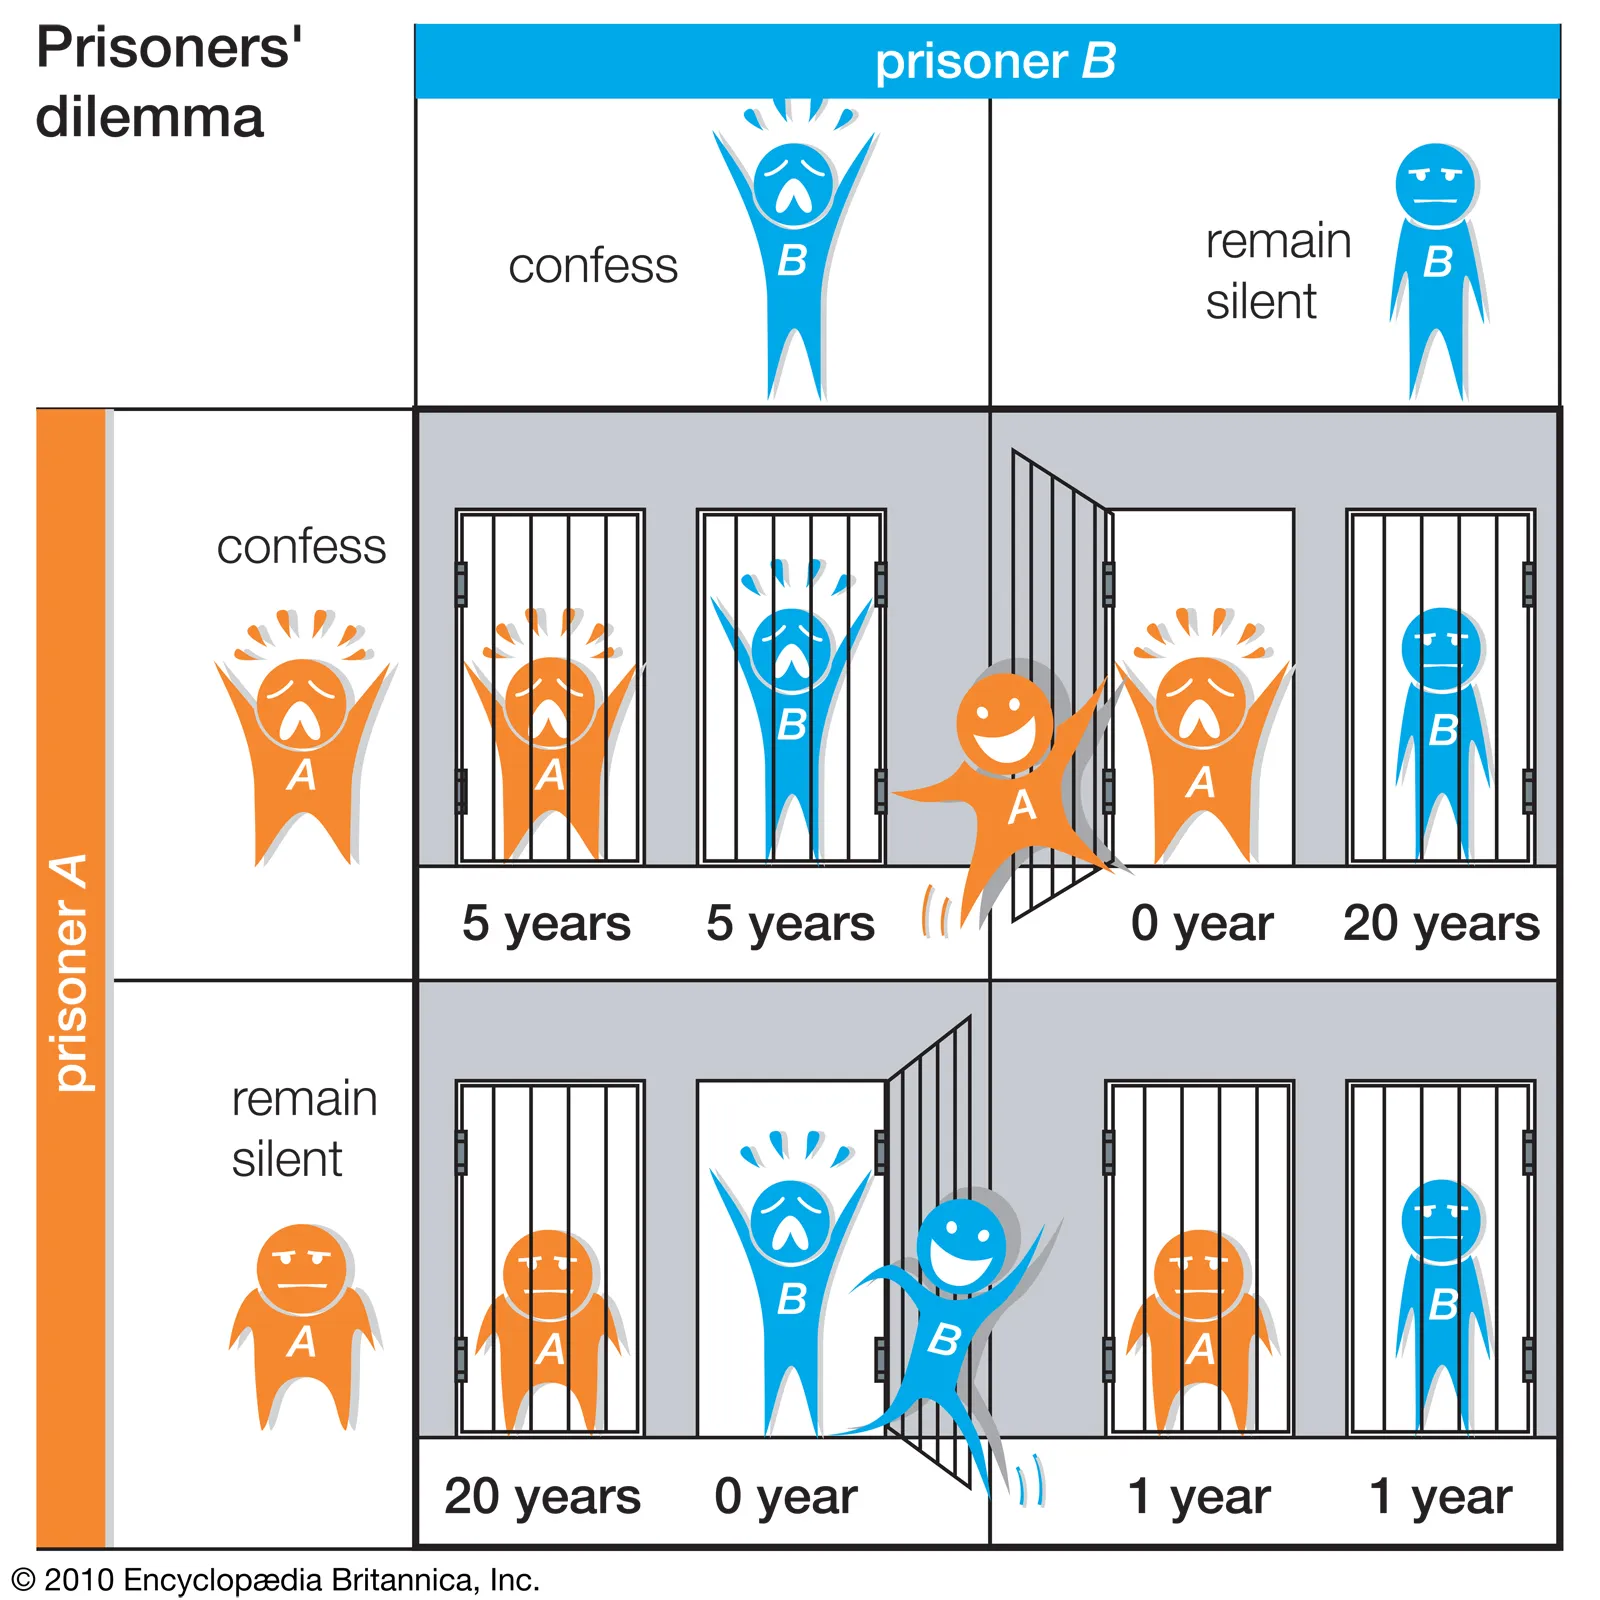

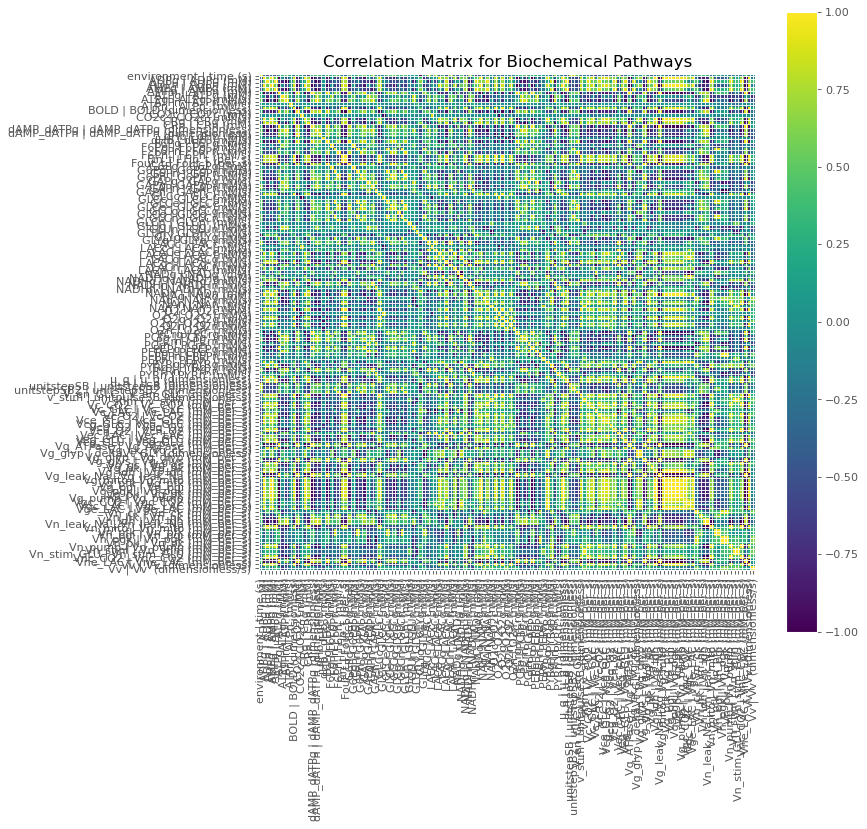

In [5]:
# Correlation matrix function
def plotCorrelationMatrix(df, graphWidth):
#     filename = df.dataframeName
    filename = 'Biochemical Pathways'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    
    #Plotting the correlation matrix
plotCorrelationMatrix(df, 10)

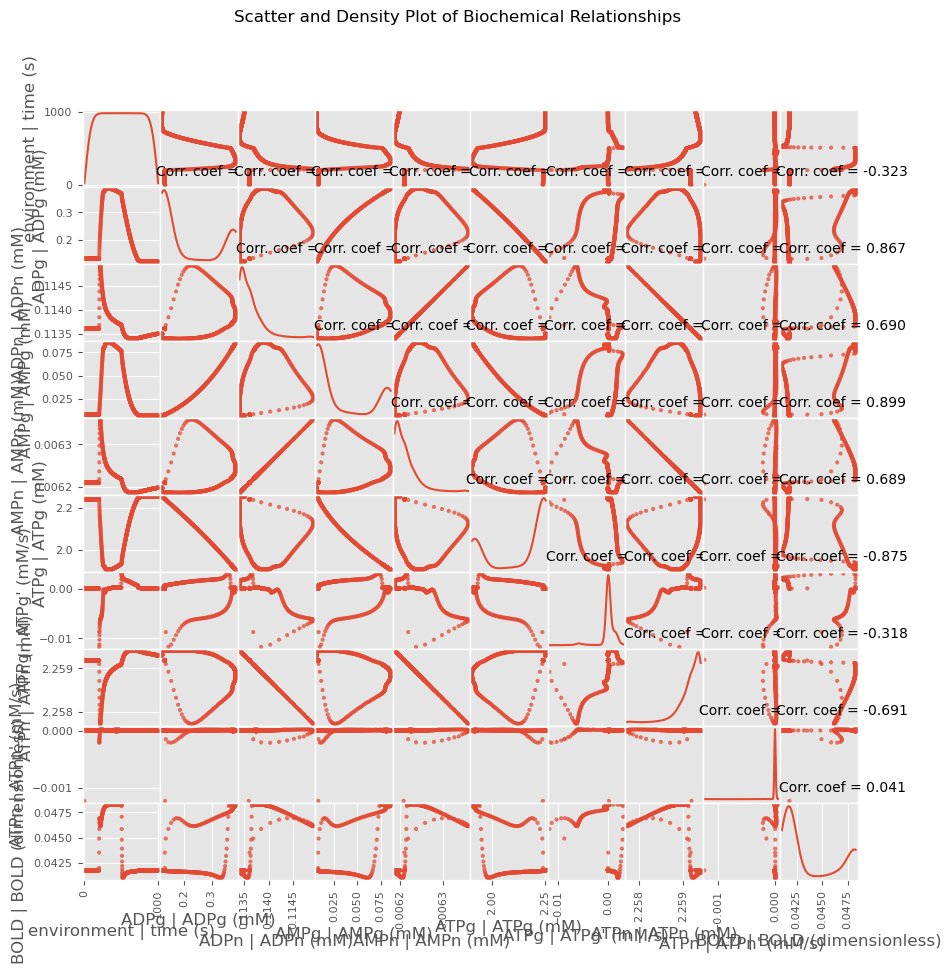

In [6]:
# Scatter and density plots function
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot of Biochemical Relationships')
    plt.show()
    
#Plotting the plot matrix
plotScatterMatrix(df, 10, 10)

# Nash Equilibrium Simulation

### 1. Select Biochemical Reaction Curve  ONE
### 2. Select Biochemical Reaction Curve  TWO
### 3. Run Simulator


In [7]:
reaxn_one = widgets.Dropdown(
    options=list(zip(df.columns,df.index))[1:],
    value=2,
    description='Number:',
)
reaxn_one

Dropdown(description='Number:', index=1, options=(('ADPg | ADPg (mM)', 1), ('ADPn | ADPn (mM)', 2), ('AMPg | A…

In [8]:
reaxn_two = widgets.Dropdown(
    options=list(zip(df.columns,df.index))[1:],
    value=2,
    description='Number:',
)
reaxn_two

Dropdown(description='Number:', index=1, options=(('ADPg | ADPg (mM)', 1), ('ADPn | ADPn (mM)', 2), ('AMPg | A…

## Once the Dropdown widgets are ran once, you can simply reseclect whatever reaction choices you want and then just re-run the simulator cell below

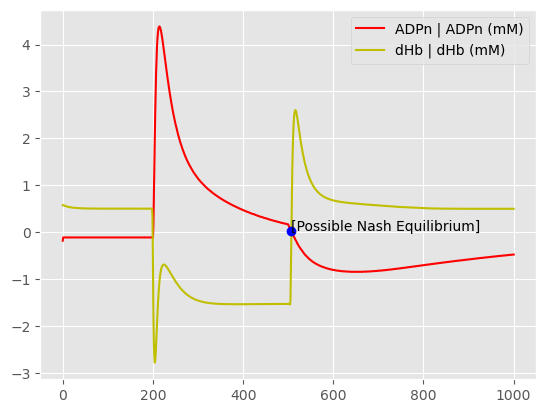

In [11]:
count1 = reaxn_one.value
count2 = reaxn_two.value

normalized_df=(df-df.mean())/df.std()

f = plt.figure()

x = range(normalized_df.shape[0])
y1 = normalized_df.iloc[:,count1]
y2 = normalized_df.iloc[:,count2]


legendLabel1 = normalized_df.columns[count1]
legendLabel2 = normalized_df.columns[count2]


plt.plot(x, y1, label = legendLabel1, c='r')
plt.plot(x, y2, label = legendLabel2, c='y')

xmin, xmax, ymin, ymax = plt.axis()

idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()
idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()

try:
    max_intersect_point = idx[idx.shape[0]-1]
    plt.plot(max_intersect_point, y1[max_intersect_point], 'bo')
    plt.annotate('[Possible Nash Equilibrium]', xy=(max_intersect_point+1, y1[max_intersect_point]))


except IndexError: # catch the error
    plt.annotate('[No Nash Equilibrium]', xy=(xmax/2, ymax/2))
    pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block

plt.legend()              
plt.show()


In [10]:
session_info.show()